In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [3]:
#This line loads our data file to the current working enviroment. From its storage location and into a dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio_train.csv', delimiter=';',index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# To display a summary of the data in our dataframe, giving useful information we could use to spot some issues early on.
# Notice that the age is in days, which is not typical.
# The systolic blood pressure 'ap_hi' has a max value of 16020 in millimeters of mecury (mmHg) which is not a possible value for human blood pressure.
# The diastolic blood pressure 'ap_low' has a max value of 11000 mmHg, this is also not possible. Using describe() helps us spot these early on.

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#just to get a list of the columns we are working with at the moment. We will make some adjustments.

df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
# We have used .loc[] to identify the columns with a systolic BP >500mmHg and displayed these in a descriptive dataframe (there are 38).

df.loc[df.ap_hi>500].describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.000000
mean,19120.052632,1.315789,164.710526,70.289474,4049.763158,67.894737,1.421053,1.131579,0.0,0.052632,0.894737,0.631579
std,2622.671487,0.471069,7.717680,12.755302,5333.535648,31.721584,0.642275,0.474829,0.0,0.226294,0.311012,0.488852
min,14425.000000,1.000000,152.000000,41.000000,701.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000
25%,16920.750000,1.000000,158.500000,63.250000,907.000000,60.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000
50%,18827.000000,1.000000,164.500000,70.500000,1300.000000,80.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000
75%,21095.750000,2.000000,169.000000,78.000000,1905.000000,90.000000,2.000000,1.000000,0.0,0.000000,1.000000,1.000000
max,23418.000000,2.000000,182.000000,105.000000,16020.000000,110.000000,3.000000,3.000000,0.0,1.000000,1.000000,1.000000


In [7]:
# We will drop the columns that have blood pressures which are unrealistically high.
# In statistics these are outliers. They tend to have an outsized influence of the outcome of our calculations if we leave them in.
# We take these entries out of our dataset as part of data-cleaning, but such decisions need to be justifiable.

bp_data = df.drop(df[(df['ap_hi'] > 500) | (df['ap_hi'] < 0) | (df['ap_lo'] > 300) | (df['ap_lo'] < 0)].index)

In [8]:
# Age is typically quoted in years, this decision is more to enable better readability for us humans.

bp_data.loc[:, 'age'] = bp_data['age'] / 365.25
bp_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000
mean,53.289002,1.348705,164.359690,74.118121,126.329126,81.332778,1.364372,1.225881,0.087868,0.053593,0.803293,0.494877
std,6.757648,0.476564,8.204166,14.328551,17.752540,9.877610,0.678692,0.571844,0.283105,0.225215,0.397512,0.499977
min,29.563313,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.342231,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.938398,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.379192,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,2.000000,250.000000,200.000000,401.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# We often use bmi in clinical decision making as it puts weight in context of a person's height.
# That is the reason why I replaced the weight and height sections with the bmi.

bp_data['bmi'] = bp_data['weight'] / (bp_data['height'] / 100) ** 2
bp_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000
mean,53.289002,1.348705,164.359690,74.118121,126.329126,81.332778,1.364372,1.225881,0.087868,0.053593,0.803293,0.494877,27.524409
std,6.757648,0.476564,8.204166,14.328551,17.752540,9.877610,0.678692,0.571844,0.283105,0.225215,0.397512,0.499977,6.080720
min,29.563313,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.342231,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.938398,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.379192,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.922656,2.000000,250.000000,200.000000,401.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [10]:
# Rearranging the dataframe after the changes above.

bp_data.drop(['height', 'weight'], axis=1, inplace=True)
bp_data = bp_data[['age', 'bmi', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]

bp_data.describe()

,age,bmi,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000,69001.000000
mean,53.289002,27.524409,1.348705,126.329126,81.332778,1.364372,1.225881,0.087868,0.053593,0.803293,0.494877
std,6.757648,6.080720,0.476564,17.752540,9.877610,0.678692,0.571844,0.283105,0.225215,0.397512,0.499977
min,29.563313,3.471784,1.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.342231,23.875115,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.938398,26.346494,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.379192,30.119376,2.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.922656,298.666667,2.000000,401.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In the code below we train 3 models on the data above. A random forest model, a support vector machine, and a gradient boosting machine.

The heatmap below shows the correlation between different features in the original dataset. The more the correlation approaches 1, the stronger the relationship between those two variables. A correlation of 1 would mean the two variables are ALWAYS seen together. Which is why there is a correlation of 1 running down the diagonal as each variable is perfectly correlated with itself.

On the far-right (and along the bottom) we see the correlation between the features and the presence of cardio vascular disease. Systolic blood pressure appears to have the highest correlation with cardiovascular disease at 0.40. Age is also correlated with an increase in age showing a correlation with cardiovascular disease. Gender has a low correlation with cardiovascular disease.

There is a bit of a surprise in the correlation. Activity is the most negatively correlated with cardiovascular disease, no surprises there as an increase in physical activity is often encouraged as a means to improve health and fitness. The surprise here is the negative correlation between smoking and alcohol with cardiovascular disease, this idea does not follow, it may be a pointer to why we use models to improve our predictions.

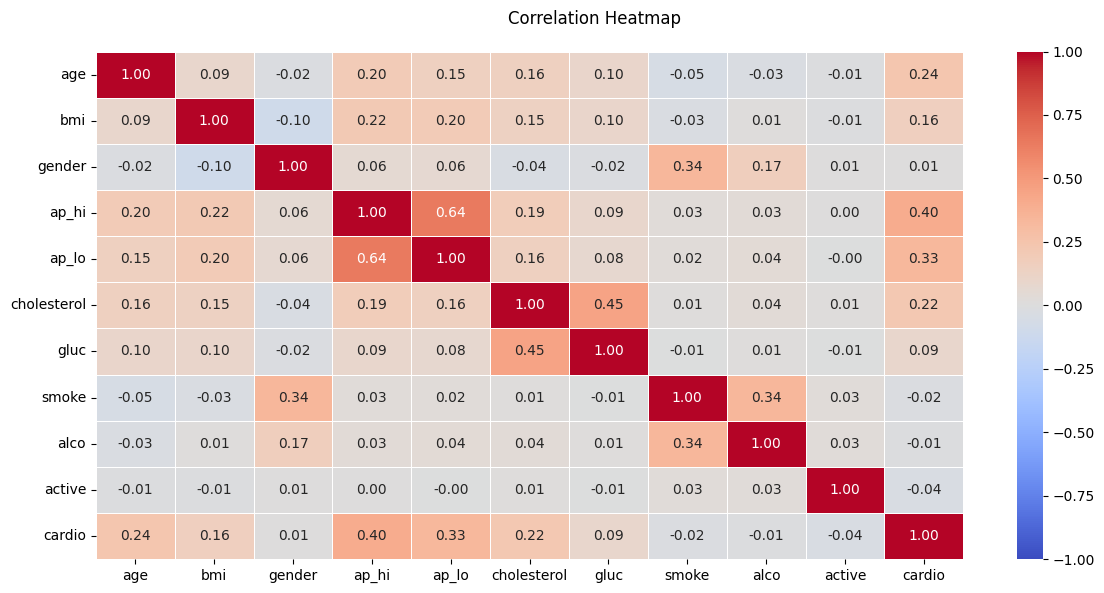

In [17]:
correlation_matrix = bp_data.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linecolor='white', linewidths=0.5)

plt.suptitle('Correlation Heatmap', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X = bp_data.drop('cardio', axis=1)  # Features
y = bp_data['cardio']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #we are keeping 20% of our data aside to be used to test the model's

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
# Random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
# SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [15]:
# Gradient boosting machine model
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

We will test the performance of these models using four performance metrics and display their performance in a bar chart: accuracy_score, precision_score, recall_score, f1_score.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
acc = accuracy_score(y_test, y_pred_rf)
print('Random forest accuracy:', acc)

acc = accuracy_score(y_test, y_pred_svm)
print('SVM accuracy:', acc)

acc = accuracy_score(y_test, y_pred_gbm)
print('Gradient boosting machine accuracy:', acc)

Random forest accuracy: 0.7087167596550975
SVM accuracy: 0.7245127164698211
Gradient boosting machine accuracy: 0.7353090355771321


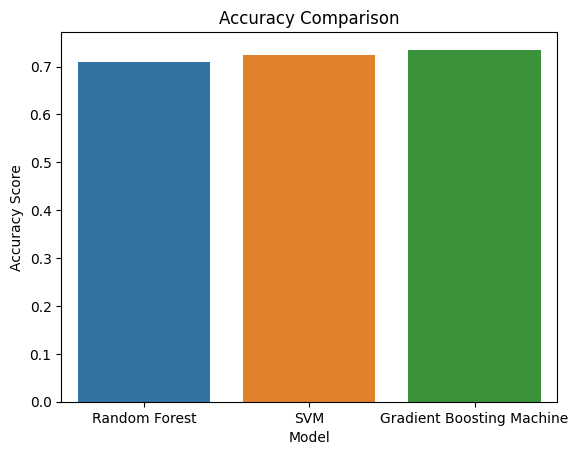

In [18]:
# Accuracy
fig, ax = plt.subplots()

sns.barplot(x=['Random Forest', 'SVM', 'Gradient Boosting Machine'], y=[accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_gbm)])

ax.set_title('Accuracy Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')
plt.show()

In [19]:
prec = precision_score(y_test, y_pred_rf)
print('Random forest precision:', prec)

prec = precision_score(y_test, y_pred_svm)
print('SVM precision:', prec)

prec = precision_score(y_test, y_pred_gbm)
print('Gradient boosting machine precision:', prec)

Random forest precision: 0.7146315630201241
SVM precision: 0.7698286521815934
Gradient boosting machine precision: 0.7539632213062778


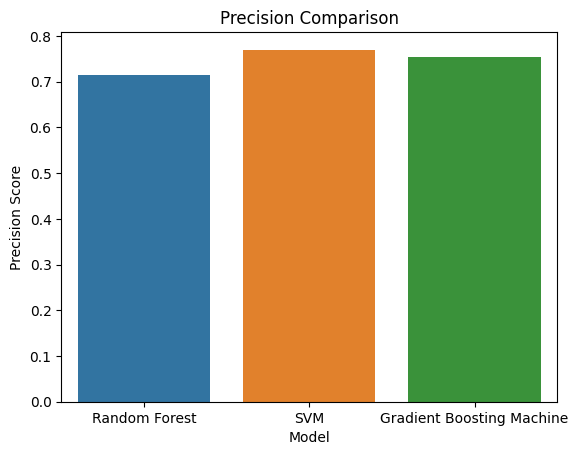

In [20]:
# Precision
fig, ax = plt.subplots()

sns.barplot(x=['Random Forest', 'SVM', 'Gradient Boosting Machine'], y=[precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_gbm)])

ax.set_title('Precision Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Precision Score')
plt.show()

In [21]:
rec = recall_score(y_test, y_pred_rf)
print('Random forest recall:', rec)

rec = recall_score(y_test, y_pred_svm)
print('SVM recall:', rec)

rec = recall_score(y_test, y_pred_gbm)
print('Gradient boosting machine recall:', rec)

Random forest recall: 0.6887851830246463
SVM recall: 0.6355549073939041
Gradient boosting machine recall: 0.6935977832871518


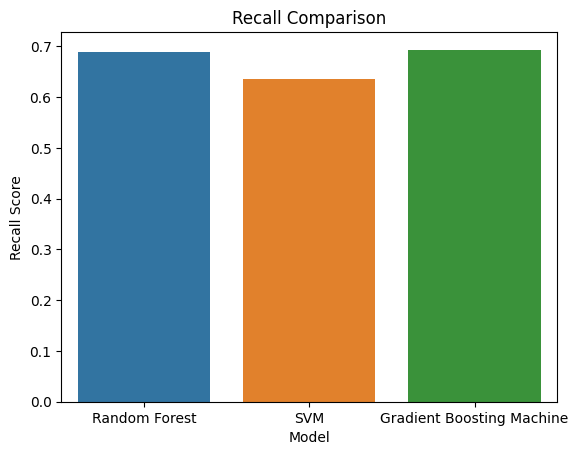

In [22]:
# Recall
fig, ax = plt.subplots()

sns.barplot(x=['Random Forest', 'SVM', 'Gradient Boosting Machine'], y=[recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_gbm)])

ax.set_title('Recall Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Recall Score')
plt.show()

In [23]:
f1 = f1_score(y_test, y_pred_rf)
print('Random forest F1-score:', f1)

f1 = f1_score(y_test, y_pred_svm)
print('SVM F1-score:', f1)

f1 = f1_score(y_test, y_pred_gbm)
print('Gradient boosting machine F1-score:', f1)

Random forest F1-score: 0.7014703698202881
SVM F1-score: 0.6962773606007349
Gradient boosting machine F1-score: 0.7225218382073682


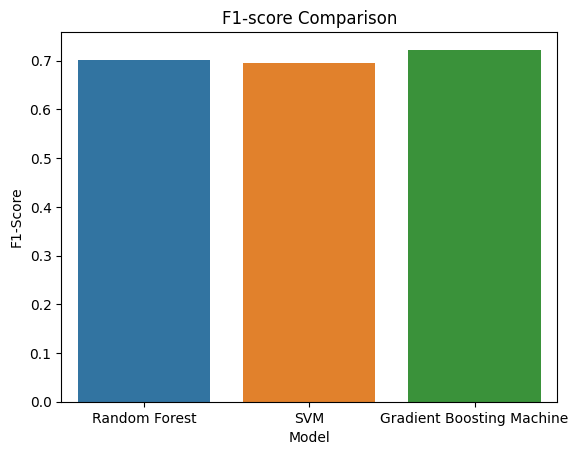

In [24]:
# F1-score
fig, ax = plt.subplots()

sns.barplot(x=['Random Forest', 'SVM', 'Gradient Boosting Machine'], y=[f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_gbm)])

ax.set_title('F1-score Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('F1-Score')
plt.show()